Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Structure de bandes électroniques du matériau:


<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

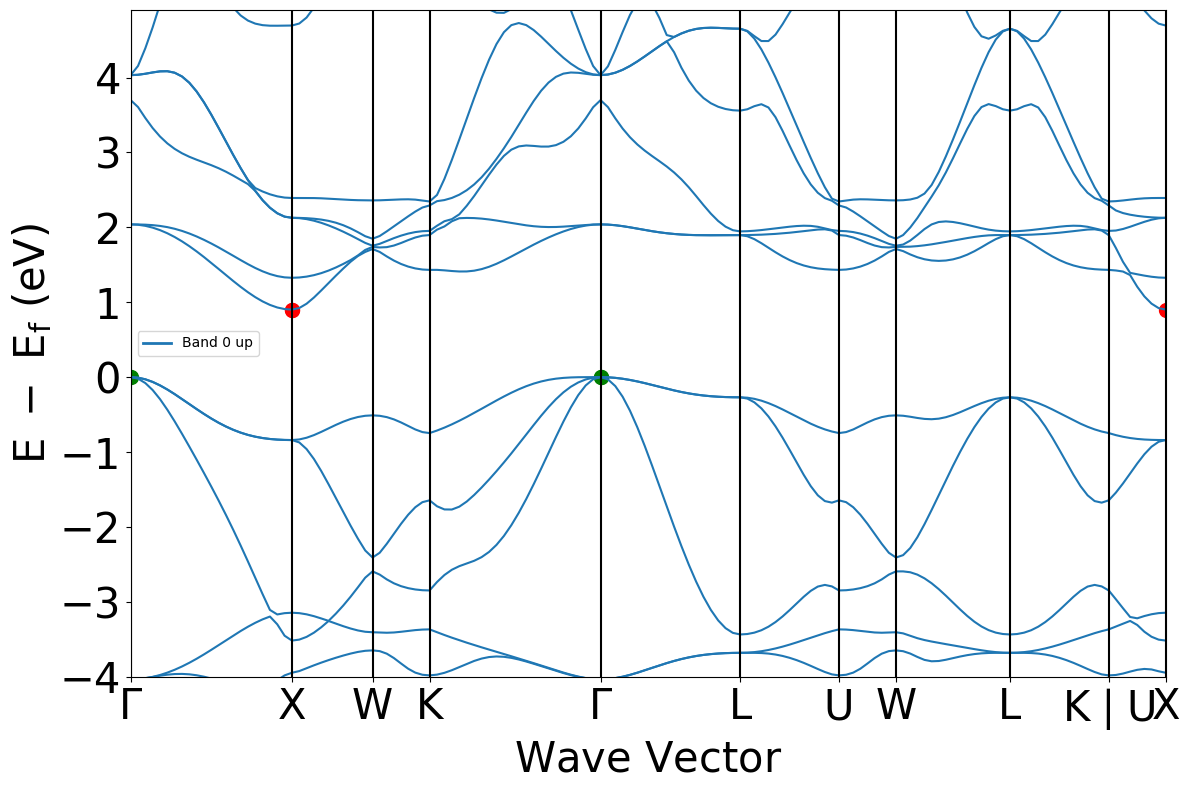

In [31]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import plotter
import numpy as np;import matplotlib.pyplot as plt

with MPRester("MykrkEqBZ7EQ2VUWndzndDME88749Z5b") as m: 
    band = m.get_bandstructure_by_material_id("mp-961706")
    


print('Structure de bandes électroniques du matériau:')
plot = BSPlotter(band)
plot.get_plot(vbm_cbm_marker=True)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.electronic_structure import bandstructure

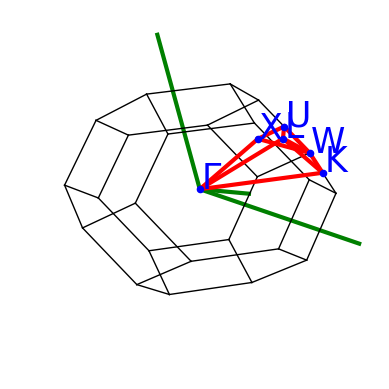

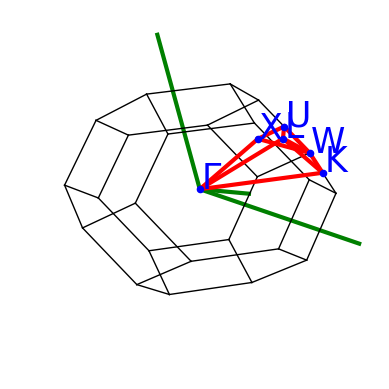

In [26]:
 BSPlotter(band).plot_brillouin() #ici, je ne sais pas pourquoi la fonction me plot deux fois la même figure

Bande interdite

La bande interdite est indirecte
Energie de la bande interdite : 0.9013 eV
La bande interdite se situe entre 0 eV et 0.9013 eV.
Vecteur de transition : \Gamma-X


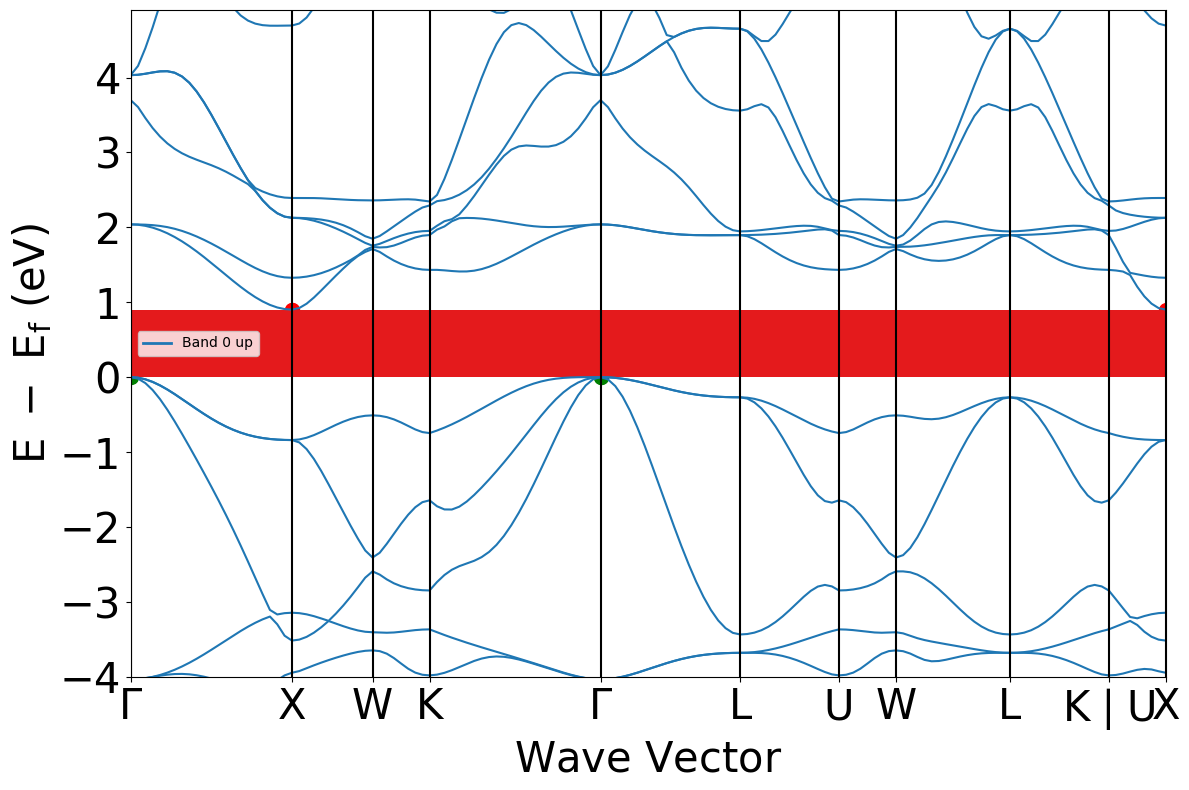

In [27]:
gap_band = band.get_band_gap()


if gap_band['direct']:
    print('La bande interdite est directe')
else:
    print('La bande interdite est indirecte')
    
print('Energie de la bande interdite :', gap_band['energy'], 'eV')
print('La bande interdite se situe entre 0 eV et {} eV.'.format(gap_band.get('energy')))
print("Vecteur de transition :", gap_band['transition'])

plotter = BSPlotter(band)


b_energy = band.get_band_gap().get('energy')
plot_data = BSPlotter(band).bs_plot_data()
d = plot_data.get('ticks').get('distance')
BSPlotter(band).get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(d[0], d[-1], 400), 0, b_energy)

La bande interdite représente la bande de valeurs énergétiques que les électrons du cristal ne peuvent pas occuper.
On voit que, dans ce cas-ci, elle est indirecte et qu'elle a une énergie de 0,9013 eV. Ce qui est cohérent avec les valeurs reprises sur The Material Project. Notre matériaux est donc un semi-conducteur.
On voit grâce au graphe de la structure de bandes électroniques qu'on a plot à la première cellule que notre bande interdite est indirecte car les points rouges et verts sont non-alignés.

Analyse de la dispersion.
Le phénomène de dispersion correspond à la variation d'énergie des électrons en fonction de leur vecteur d'onde dans le cristal. On va donc devoir déterminer les pentes maximales et minimales pour nos diffétentes branches. Une pente maximale sera associée à un maximum de dispersion(et donc des énergies très différentes) et une pente minimale sera associée à un minimum de dispersion(et donc des énergies plus ou moins similaires).

Dernière bande de valence

In [34]:

data = plotter.BSPlotter(band).bs_plot_data()

x = data.get('ticks').get('distance')
#print('Tableau distance :', x, '\n')

x = np.unique(x)#pour éviter les dégénérescances

y = data.get('energy')

# On determine E0
E_0 = data.get('zero_energy')
print("Energie_0 = {} eV".format(E_0))


vbm = band.get_vbm()  # VBM = maximum de la bande de valence
E_vbm = vbm['energy'] 
kpoint_vbm = vbm['kpoint'].cart_coords

print('Energie du maximum de la bande de valence = {} eV'.format(E_vbm))
print('Sur le graphe : E-Ef = ', (E_vbm-E_0))
print('Vecteur k  en coordonnées cartésiennes =', kpoint_vbm)
print(vbm.get('band_index'))

Energie_0 = 6.4775 eV
Energie du maximum de la bande de valence = 6.4775 eV
Sur le graphe : E-Ef =  0.0
Vecteur k  en coordonnées cartésiennes = [0. 0. 0.]
defaultdict(<class 'list'>, {<Spin.up: 1>: [9, 10, 11]})


Ici, on voit que les bandes 9,10,11 contiennent la plus grande énergie de la bande de valence. Ils sont représentés par les points verts sur le graphe de la première entrée.

Première bande de conduction

In [49]:
#cbm = minimum de la bande de conduction
cbm = band.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction = ',E_cbm,'eV')
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =',kpoint_cbm)
print(cbm.get('band_index'))

Energie du minimum de la bande de conduction =  7.3788 eV
sur le graphe : E-Ef =  0.9013
Vecteur k (coordonnées cartésiennes) = [ 0.00000000e+00  1.06503295e+00 -1.11022302e-16]
defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})


On voit que la 12ème bande a la plus basse énergie(correspond au point rouge sur le diagramme de bande).
On va maintenant s'intéresser au minimum et maximum de dispersion(via les pentes de nos bandes).

In [22]:
dx = np.zeros(10)
dyc = np.zeros(10)
dyv = np.zeros(10)
mc = np.zeros(10)
mv = np.zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]
    
for i in range(10):
    dyv[i] =y.get('1')[i][14][-1] - y.get('1')[i][14][0]
    dyc[i] =y.get('1')[i][15][-1] - y.get('1')[i][15][0]
    
for i in range (10):
    mc[i] = dyc[i]/dx[i]
    mv[i] = dyv[i]/dx[i] 
    
index_disp_val_max = np.argmax(mv)
index_disp_val_min = np.argmin(mv)
index_disp_cond_max = np.argmax(mc)
index_disp_cond_min = np.argmin(mc)

#print(index_disp_val_max); print(index_disp_val_min)
#print(index_disp_cond_min); print(index_disp_cond_max)
#valence max 3
#valence min 4
#conduction max 7
#conduction min 8
mxV = np.max((mv))
print("Plus grande dispersion pour la bande de valence: ", mxV)
mxC = np.max((mc))
print("Plus grande dispersion pour la bande de conduction: ", mxC)
mnV = np.min((mv))
print("Plus faible dispersion pour la bande de valence: ", mnV)
mnC = np.min((mc))
print("Plus faible dispersion pour la bande de conduction: ", mnC)


3
4
8
7
En valeur absolue:
Plus grande dispersion pour la bande de valence:  1.5456278510111454
Plus grande dispersion pour la bande de conduction:  2.2706388532896433
Plus faible dispersion pour la bande de valence:  -1.9002638721226564
Plus faible dispersion pour la bande de conduction:  -1.9408251624961586


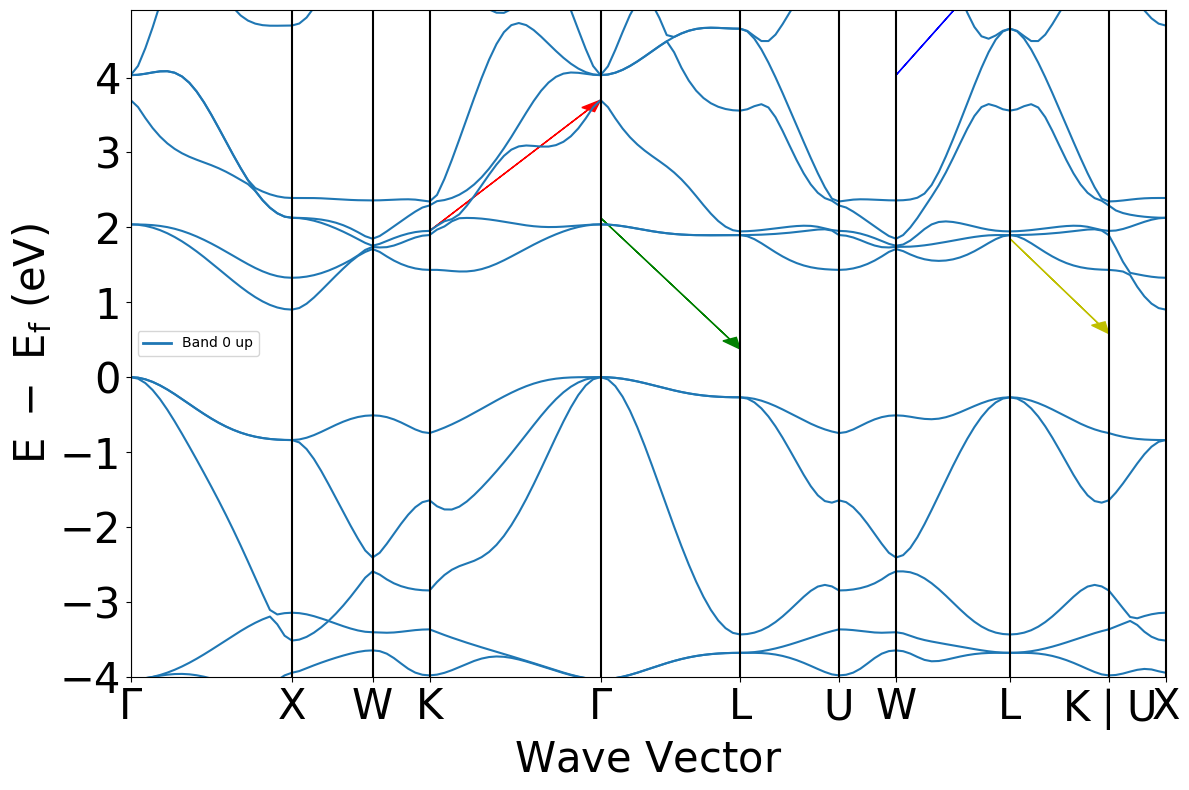

In [23]:

BSPlotter(band).get_plot()
plt.arrow(x[3], (y.get('1')[3][14])[0], dx[3], dyv[3], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[4], (y.get('1')[1][14])[0], dx[4], dyv[4], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(x[7], (y.get('1')[0][15])[0], dx[7], dyc[7], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(x[8], (y.get('1')[2][15])[0], dx[8], dyc[8], color = 'y', head_width = 0.1,length_includes_head=True)

plt.show()

Dispersion sur la dernière bande de valence:
La plus grande dispersion est localisée sur K-Gamma: . Elle vaut 1.5456278510111454 et est représentée en rouge.
La plus faible dispersion est localisée sur: Gamma-L. Elle vaut -1.9002638721226564 et est représentée en vert.


Dispersion sur la première bande de conduction:
La plus grande dispersion est localisée sur: W-L. Elle vaut 2.2706388532896433 et est représentée en bleu.
La plus faible dispertion est localisée sur: L-K. Elle vaut  -1.9408251624961586 et est représentée par une flèche jaune.

Pour cette partie, nous supposons avoir une dispersion parabolique. On a donc la formule suivante m = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*abs(E_vbm)) avec hbarre la constante de Planck/2pi , E_vbm/_cbm l'énergie sur les différentes bandes et kpoint_vbm/_cbm les composantes du vecteur d'onde.

Cependant, cette formule est uniquement utilisable si la norme est non nulle. 
Pour notre bande de valence, la norme du vecteur d'onde est nulle.

Masse effective au sommet de la dernière bande de valence

In [43]:
kpoint_val = band.get_vbm().get('kpoint').frac_coords
norm_k_val = np.linalg.norm(kpoint_val)
print('Pour la bande de valence, la valeur de la norme est {}'.format(norm_k_val))



h_bar = 6.5821e-16
m_electron = 9.11e-31

m_vbm = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*abs(E_vbm))
print('La masse effective au sommet de la dernière bande de valence = {} kg.'.format(m_vbm))

Pour la bande de valence, la valeur de la norme est 0.0
La masse effective au sommet de la dernière bande de valence = 0.0 kg.


Masse effective à la base de la première bande de conduction

In [44]:
kpoint_con = band.get_cbm().get('kpoint').frac_coords
norm_k_con = np.linalg.norm(kpoint_con)

print('Pour la bande de conduction, la valeur de la norme est {}'.format(norm_k_con))
m_cbm = (h_bar**2 * (kpoint_cbm[0]**2+kpoint_cbm[1]**2+kpoint_cbm[2]**2))/(2*E_cbm)
print('La masse effective à la base de la première bande de conduction = {} kg.'.format(m_cbm))

Pour la bande de conduction, la valeur de la norme est 0.7071067811865476
La masse effective à la base de la première bande de conduction = 3.3299622042235806e-32 kg.
